In [48]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

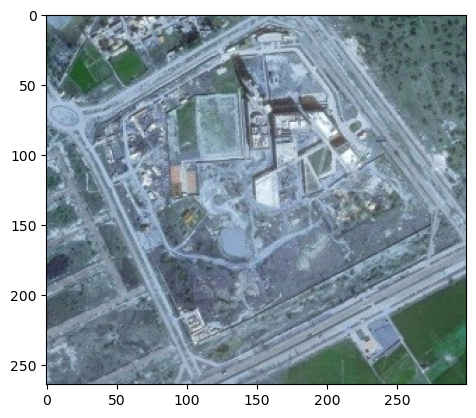

In [49]:
# Reading the image through imread function of opencv
image = cv.imread("sat_image_plaksha.jpg")
plt.imshow(image)

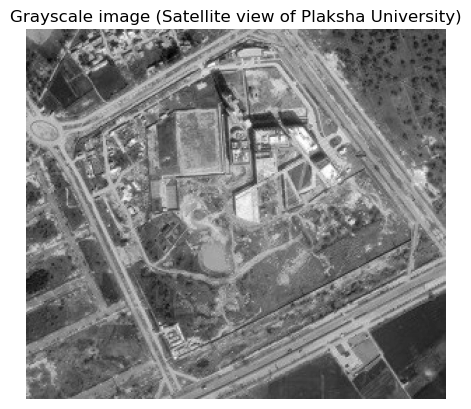

In [54]:
# Converting the image to RGB format
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Converting the image to grayscale
image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.title("Grayscale image (Satellite view of Plaksha University)")
plt.axis("off")
plt.imshow(image, cmap='gray')

In [18]:
# Converting the image to double for performing mathematical operations
image = image.astype(np.float64)

In [19]:
# Computing the mean of each column (pixels) and subtracting it from the image
mean_column = np.mean(img, axis=0)
image_mean_subtracted = image - mean_column

In [22]:
# Computing the covariance matrix
cov_matrix = np.cov(img_mean_subtracted, rowvar=False)

In [34]:
# Getting real eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

In [35]:
# Sorting eigen vectors by eigen values
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:, sorted_indices]

In [36]:
# Defining the number of principal components to keep
num_components_list = [10, 20, 30, 40, 50, 60, 91]
# Reconstructing the image for different numbers of components
output_images = [] # Empty list to store the images
for num_components in num_components_list:
    selected_components = eigen_vectors[:, :num_components] # Extracting the top N eigen vectors
    projected_data = np.dot(image_mean_subtracted, selected_components) # Projecting the data on the selected components
    reconstructed_image = np.dot(projected_data, selected_components.T) + mean_column # Reconstructing the image
    output_images.append(reconstructed_image) # Appending the reconstructed image to the list

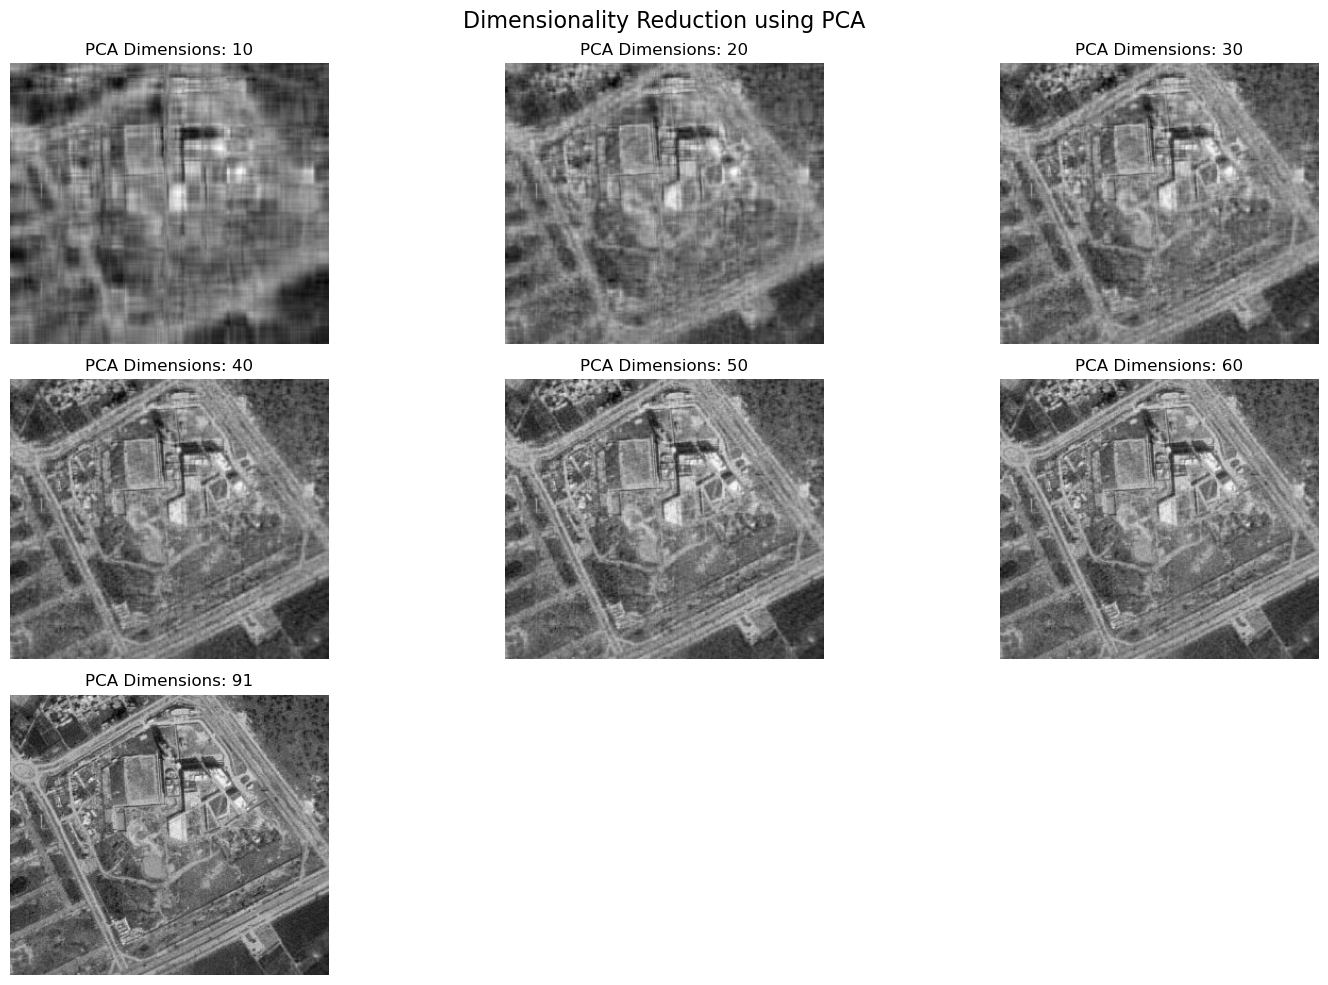

In [57]:
# Plotting and displaying the images
plt.figure(figsize=(15, 10))
plt.suptitle("Dimensionality Reduction using PCA", fontsize=16)
for i, (img, num) in enumerate(zip(output_images, num_components_list)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title(f'PCA Dimensions: {num}')
plt.tight_layout()
plt.show()

In [45]:
# Using PCA function to see how the dimension 91 explains 95% variance in data
pca = PCA(n_components=91)
pca.fit(image_mean_subtracted)

# Calculating the cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of components that explain 95% of the variance
num_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1

print(f"Number of components explaining 95% variance: {num_components_95}")

Number of components explaining 95% variance: 91



# Report

### Q1: What is the difference between PCA and Feature Selection? 

Ans. Although both are dimensionality reduction techniques but they differ in certain aspects. PCA actually transforms the original features into new uncorrelated components, while feature selection picks a subset of the original features. PCA is useful for handling multicollinearity, while feature selection focuses on retaining the most relevant features for model performance. It might be harder to interpret PCA since the new components are combinations of the original features, whereas feature selection maintains interpretability by keeping the original features.

### Q2: Why do we standardize features before applying PCA? 

Ans. PCA works under the assumption that the data is Gaussian, thus standardization is important so that large differences between range of variables could be minimized.
PCA is sensitive to scale of features. It works by maximizing variance along the principal components. If features are on different scales (like, one feature ranges from 0 to 1 and another from 0 to 1000), the feature with the larger scale will dominate the variance, leading to biased results.
Also, standardizing features (mean = 0, sd = 1) ensures that each feature contributes equally to the computation of principal components. That's why standardization is essential before applying PCA.

### Q3: What is the importance of Covariance Matrix in PCA?

Ans. The covariance matrix captures the relationships (covariances) between pairs of features in the dataset. It shows how much two features change together. The eigenvectors of the covariance matrix represent the principal components, and the corresponding eigenvalues indicate the amount of variance explained by each principal component.

### Q.4: What are some limitations of PCA?

Ans. Some of the limitations of PCA are as follows:
1. Interpretation of PCs: It is often difficult to interpret Principal Components as they are a combination of the original features. Thus, it is hard to know which features contributed how much for principal components.
2. Information Loss: Some information will always be lost when we will choose a few principal components from all. Thus, it is important to know how many to choose.
3. Linear assumption: PCA works by assuming that the features have a linear relationship between them. If it is not linear, PCA may not work well.
4. Computational Complexity: This will come into play if the number of variables is very large.

### Q.5: How can we figure out the importance of individual PCs in PCA?

Ans. In PCA, we find the principal components that explain the maximum variance in the data. The PCs are orthogonal to each other.
We can figure out the importance of individual PCs through:
The eigenvalues associated with each principal component indicate the amount of variance explained by that component. Larger eigenvalues correspond to more important components.
The explained variance ratio is the proportion of the dataset's total variance that is captured by each principal component. It helps determine the relative importance of each principal component.